Importing all the modules

In [1]:
import datetime as dt
import pandas as pd
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as data
import matplotlib.pyplot as pt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure


Specifying the Date

In [2]:
end = dt.date.today()
start = dt.datetime(end.year,end.month-1,end.day)

Collecting the Data set

In [3]:
com_df1 = pd.DataFrame(data.DataReader('BSE/BOM500331', 'quandl', start=start, end=end )['Close'])    #Pidilite_Ind

In [4]:
com_df2 = pd.DataFrame(data.DataReader('BSE/BOM512070', 'quandl', start=start, end=end )['Close'])    #UPL

In [5]:
com_df3 = pd.DataFrame(data.DataReader('BSE/BOM500770', 'quandl', start=start, end=end )['Close'])    #Tata_Chemicals

In [6]:
com_df4 = pd.DataFrame(data.DataReader('BSE/BOM532725', 'quandl', start=start, end=end )['Close'])    #Solar_Ind

In [7]:
com_df5 = pd.DataFrame(data.DataReader('BSE/BOM524208', 'quandl', start=start, end=end )['Close'])    #Aarti_Ind

Renaming the close columns

In [8]:
Pidilite_Ind = com_df1.rename(columns={'Close':'Pidilite_Ind'})
UPL = com_df2.rename(columns={'Close':'UPL'})
Tata_Chemicals = com_df3.rename(columns={'Close':'Tata_Chemicals'})
Solar_Ind = com_df4.rename(columns={'Close':'Solar_Ind'})
Aarti_Ind = com_df5.rename(columns={'Close':'Aarti_Ind'})

Joinig all the data frames

In [9]:
close_df = (((Pidilite_Ind.join(UPL, how="outer")).join(Tata_Chemicals, how="outer")).join(Solar_Ind, how="outer")).join(Aarti_Ind,how="outer")

In [10]:
close_df

,Pidilite_Ind,UPL,Tata_Chemicals,Solar_Ind,Aarti_Ind
Date,,,,,
2018-08-14,1122.70,610.05,673.20,1247.75,1350.00
2018-08-13,1123.60,625.75,674.85,1243.70,1382.45
2018-08-10,1122.40,635.25,673.20,1271.90,1394.50
2018-08-09,1124.75,636.50,675.80,1269.30,1428.55
2018-08-08,1120.45,646.60,672.20,1272.50,1384.10
2018-08-07,1105.85,647.35,669.95,1272.05,1329.65
2018-08-06,1098.75,656.75,693.80,1264.10,1293.70
2018-08-03,1107.90,641.60,693.75,1284.60,1275.25
2018-08-02,1101.30,636.10,689.50,1270.30,1251.25


In [11]:
import seaborn as sns
sns.set_style('whitegrid')

In [12]:
rets = close_df.pct_change()                                    #returns -- one day percent change for each of the stocks
rets.head()

,Pidilite_Ind,UPL,Tata_Chemicals,Solar_Ind,Aarti_Ind
Date,,,,,
2018-08-14,NaN,NaN,NaN,NaN,NaN
2018-08-13,0.000802,0.025736,0.002451,-0.003246,0.024037
2018-08-10,-0.001068,0.015182,-0.002445,0.022674,0.008716
2018-08-09,0.002094,0.001968,0.003862,-0.002044,0.024417
2018-08-08,-0.003823,0.015868,-0.005327,0.002521,-0.031115


# Pair Plotting

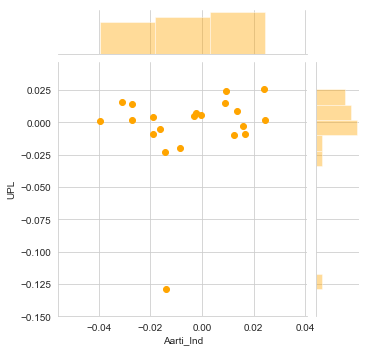

In [13]:
sns.jointplot('Aarti_Ind','UPL',rets, kind='scatter',height=5, color='orange')

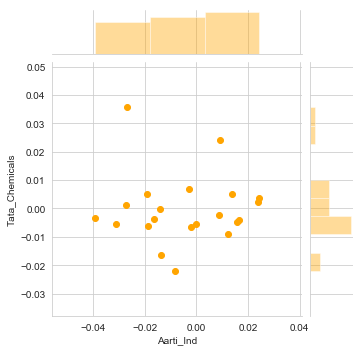

In [14]:
sns.jointplot('Aarti_Ind','Tata_Chemicals',rets, kind='scatter',height=5, color='orange')

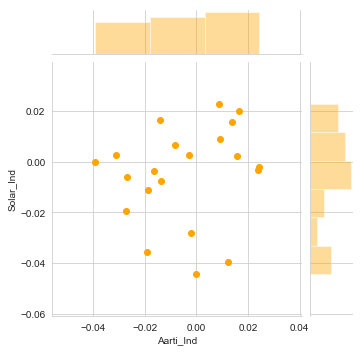

In [15]:
sns.jointplot('Aarti_Ind','Solar_Ind',rets, kind='scatter',height=5, color='orange')

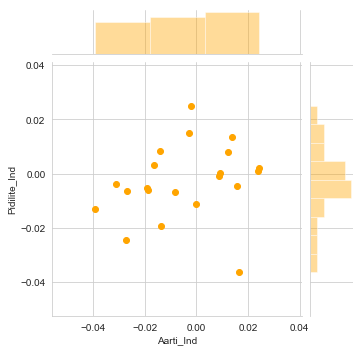

In [16]:
sns.jointplot('Aarti_Ind','Pidilite_Ind',rets, kind='scatter',height=5, color='orange')

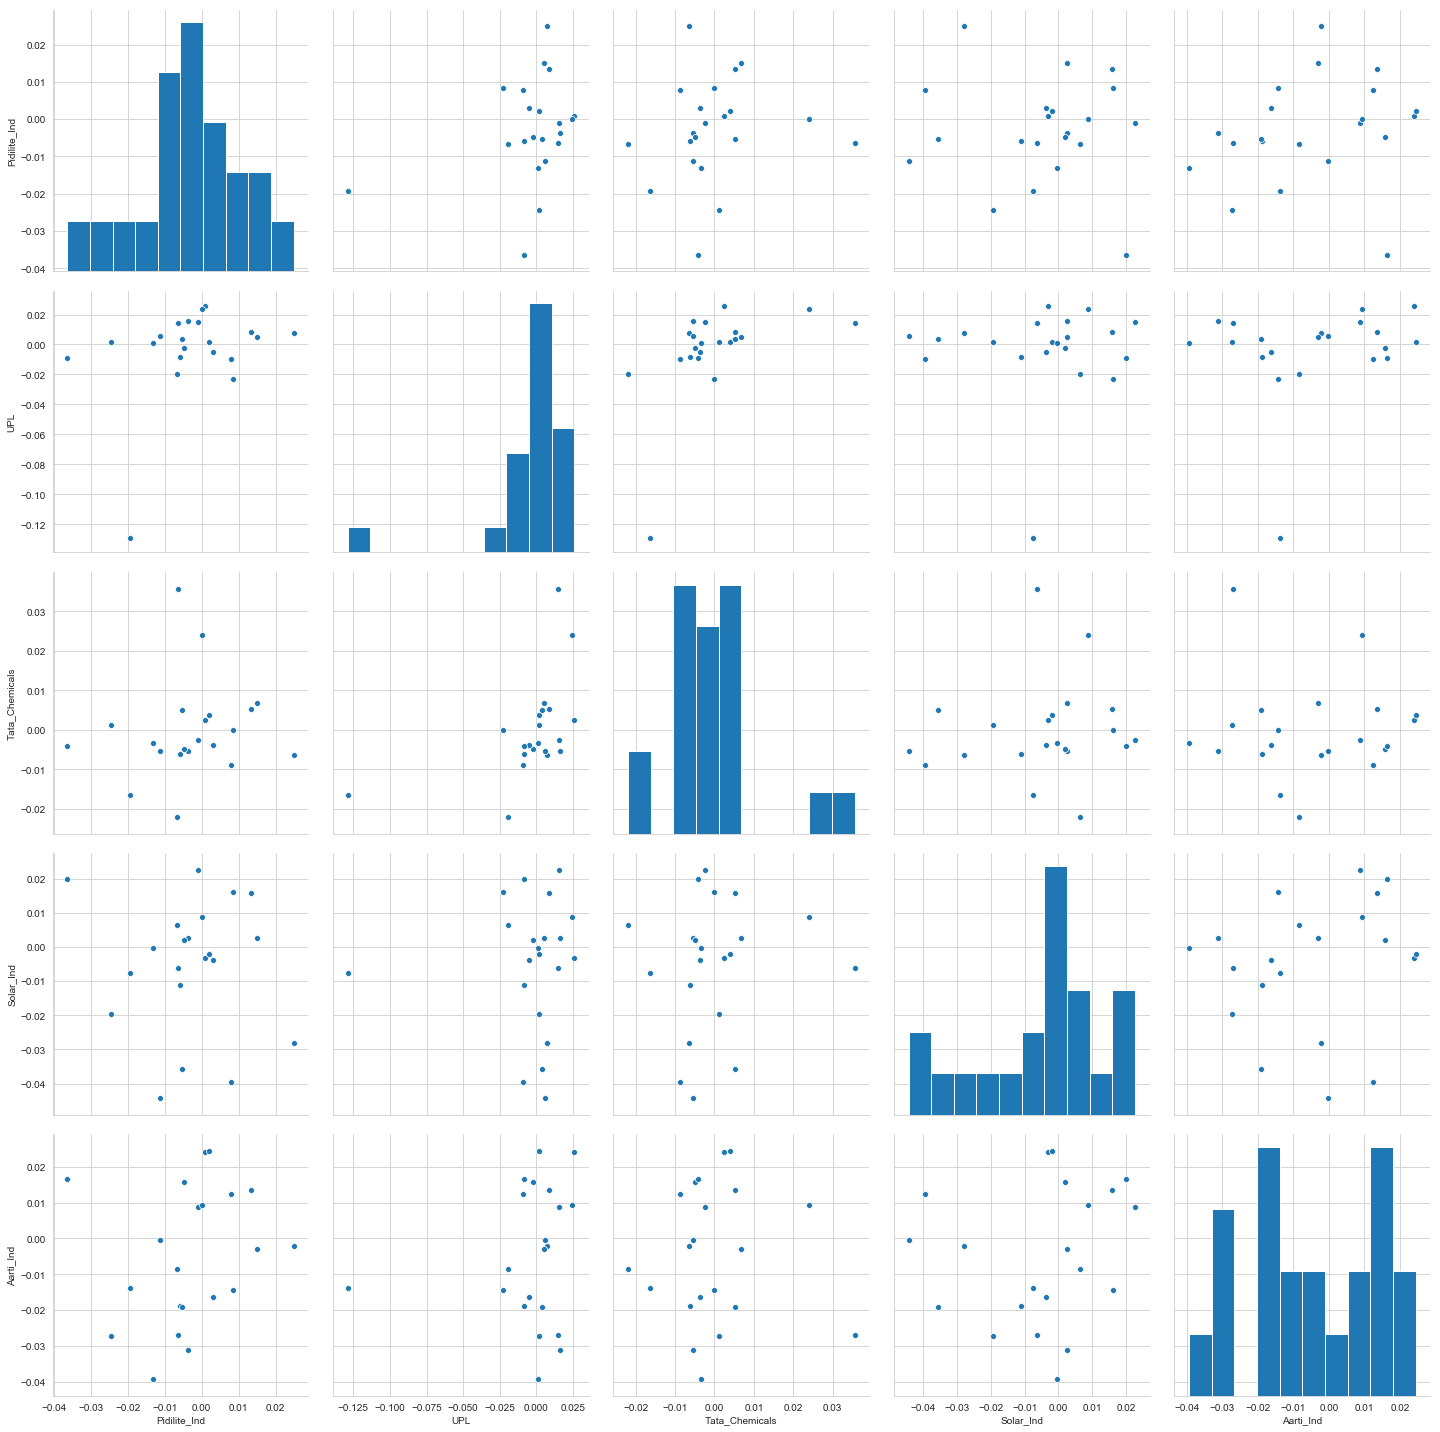

In [17]:
sns.pairplot(rets.dropna(),height=4)

# Correlation Matrix

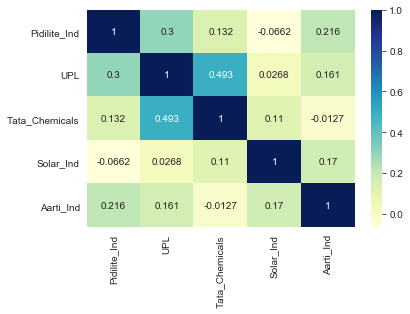

In [18]:
sns.heatmap(rets.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

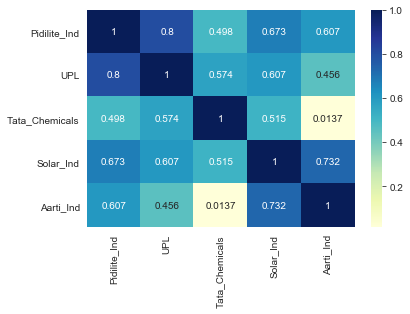

In [19]:
sns.heatmap(close_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

<H2> Risk Return Analysis

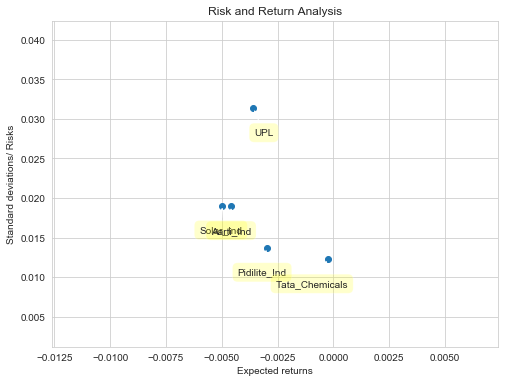

In [20]:
fig, ax = pt.subplots(figsize=(8,6))
pt.scatter(rets.mean(), rets.std())
pt.xlabel('Expected returns')
pt.ylabel('Standard deviations/ Risks')
pt.title('Risk and Return Analysis')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    pt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'top',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [21]:
import numpy as np
import statsmodels.api as sm
X=close_df[['UPL','Tata_Chemicals','Solar_Ind','Pidilite_Ind']]
X = sm.add_constant(X)
y=close_df['Aarti_Ind']
model = sm.OLS(y,X,missing='drop')             #drop rows with missing values
result = model.fit()                           #adjusts the data to model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Aarti_Ind   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     15.61
Date:                Wed, 15 Aug 2018   Prob (F-statistic):           1.56e-05
Time:                        10:11:06   Log-Likelihood:                -106.52
No. Observations:                  22   AIC:                             223.0
Df Residuals:                      17   BIC:                             228.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2514.0326    659.807      3.810      0.001    1121.962    3906.103
UPL                0.1097      0.384      0.286      0.778      -0.700       0.919
Tata_Chemicals    -4.2100      1.024     -4.113      0.001      -6.370      -2.050
Solar_Ind          0.6634      0.135      4.900      0.000       0.378       0.949
Pidilite_Ind       0.6933      0.428      1.619      0.124      -0.210       1.597
==============================================================================
Omnibus:                        1.312   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.519   Jarque-Bera (JB):                0.901
Skew:                           0.485   Prob(JB):                        0.637
Kurtosis:                       2.795   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Plotting the Predicted values and actual values to the model

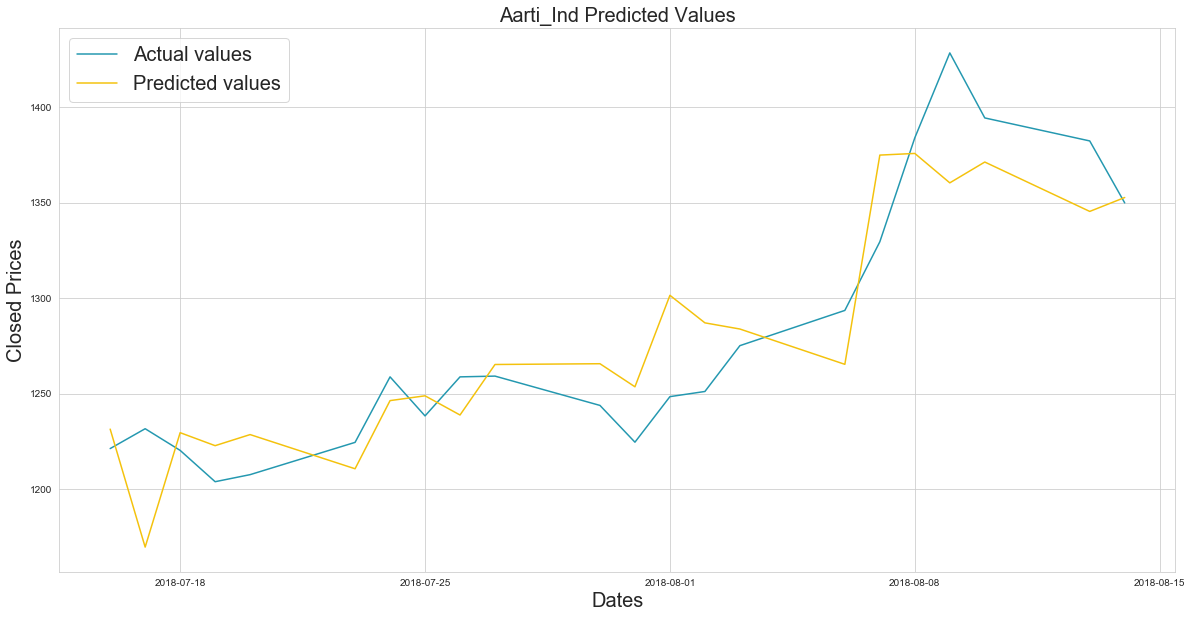

In [22]:
fig, ax = pt.subplots(figsize=(20,10))
ax.plot(y, color="#2498B0", label="Actual values")
ax.plot(result.fittedvalues, color='#f4c20d', label="Predicted values")
ax.set_xlabel('Dates',size=20)
ax.set_ylabel('Closed Prices',size=20)
ax.set_title('Aarti_Ind Predicted Values',size=20)
p,q = ax.get_legend_handles_labels()
ax.legend(p, q)
pt.legend(prop={'size':20})